<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/08_deep_learning/examen_final_q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Charger les données Fashion MNIST
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Normaliser les données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Mettre en forme les données pour les convolutions (ajouter une dimension pour le canal)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convertir les étiquettes en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# Créer le modèle CNN
model = models.Sequential()

# Première couche de convolution
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Deuxième couche de convolution
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Applatissement
model.add(layers.Flatten())

# Couches entièrement connectées
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes de sortie

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [6]:
# Afficher la structure du modèle
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Évaluer la précision sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Précision sur l\'ensemble de test : {test_accuracy}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

1/1 [==============================] - 0s 159ms/step


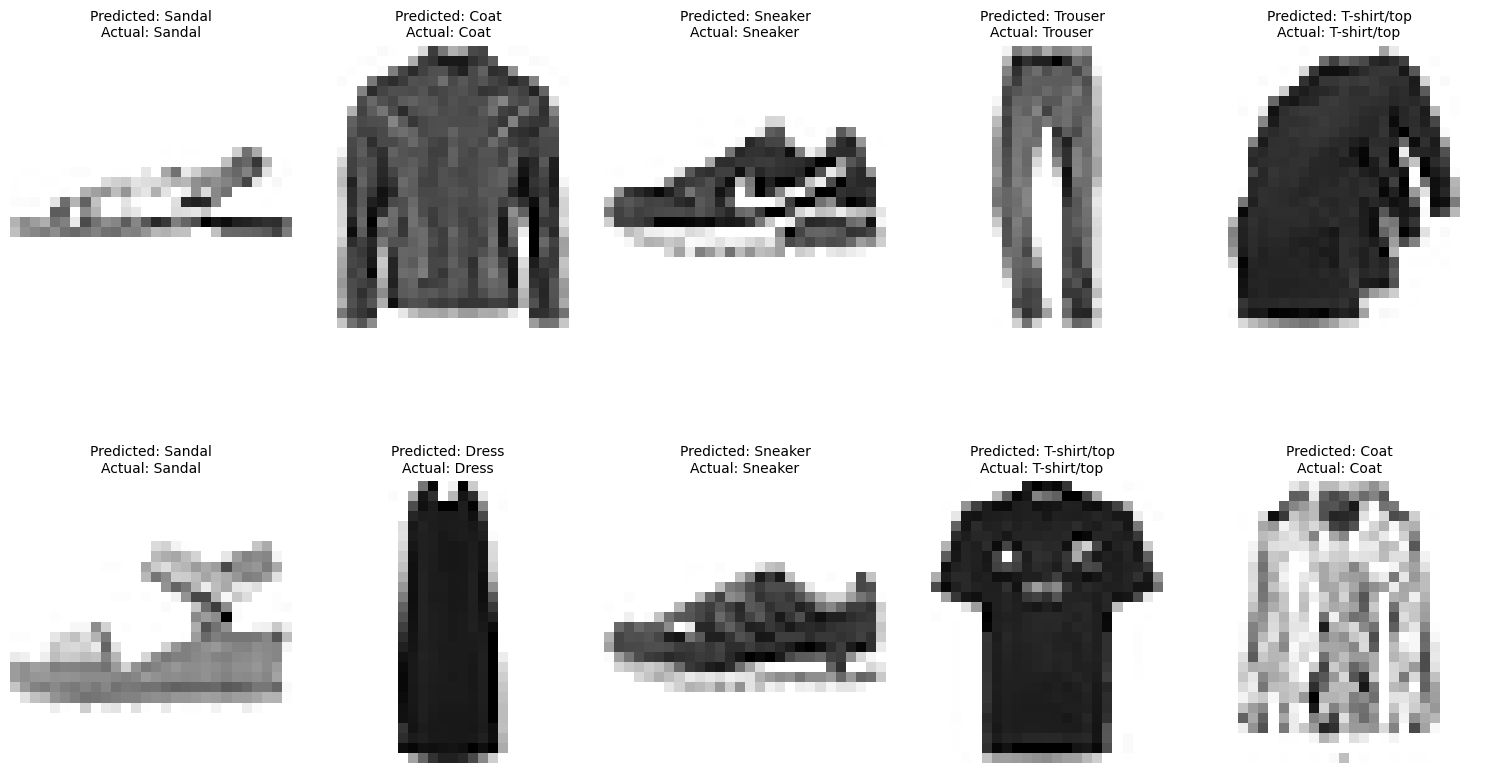

In [9]:
# Make predictions on a subset of the test data
subset_size = 10  # Number of images to show
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
subset_images = X_test[subset_indices]
subset_labels = y_test[subset_indices]

# Make predictions on the subset
predictions = model.predict(subset_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display the images along with predictions and real labels
plt.figure(figsize=(15, 10))
for i in range(subset_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(subset_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[np.argmax(subset_labels[i])]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()